## Project TODO Steps
 1. create dataset
  - create single signal generator class
  - create mixed signal generator class
  - create noise functions (Gaussian, OU, etc.)
 2. create network
 3. train network
 4. test network

## Parameters to test
 1. sequence length
 2. amplitude
 3. frequency (period)
 4. offset
 5. phase
 6. noise
 
## Questions to answer
 1. What would a batch look like?
 2. How many LSTM layers do we need? nodes per LSTM layer?
 3. Can we learn if our timestamps are not uniformly spaced.

In [1]:
import numpy as np
import pandas as pd
from random import random

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Masking
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [3]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 16
BIGGEST_SIZE = 20
plt.rc('font', size=BIGGEST_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=BIGGEST_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGEST_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

## Build a signal generator

In [4]:
from discrimnn.signal import MixedSignal

In [46]:
# start off with simplest case for proof of concept
n_timesteps = 601

sig1_coeffs = {'phase_range': (0, 2 * np.pi), 'period': 24.0, 'offset': 3.0}
sig2_coeffs = {'phase_range': (0, 2 * np.pi), 'period': 12.0, 'offset': 0.0}
sig3_coeffs = {'phase_range': (0, 2 * np.pi), 'period': 48.0, 'offset': -3.0}
coeffs_list = [sig1_coeffs, sig2_coeffs, sig3_coeffs]

msig = MixedSignal(0, 300, n_timesteps, coeffs_list)
n_signals = len(msig)
X, y = msig()

print(X.shape, y.shape)
# print(X)
# print(y)

(601, 1, 2) (601, 3)


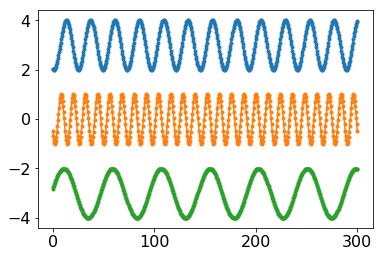

In [47]:
for i in range(n_signals):
    plt.plot(msig.timestamps, msig.signals[i], marker='.')

In [48]:
def highlight_column_matches(data, column='', color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_mixed = data == data[column]
        return [attr if v else '' for v in is_mixed]
    else:  # from .apply(axis=None)
        is_mixed = data == data[column]
        return pd.DataFrame(np.where(is_mixed, attr, ''), index=data.index, columns=data.columns)
    
df = pd.DataFrame(np.vstack((msig.signals, msig.mixed_signal)).T, index=msig.timestamps, columns=['A', 'B', 'C', 'Mixed'])
df[:5].style.apply(highlight_column_matches, column='Mixed', color='lightblue', axis=1)

,A,B,C,Mixed
0.0,2.04363,-0.464342,-2.82278,2.04363
0.5,2.01368,-0.677744,-2.75879,2.01368
1.0,2.0006,-0.84496,-2.69583,-2.69583
1.5,2.00463,-0.954593,-2.63418,2.00463
2.0,2.02568,-0.999172,-2.5741,2.02568
2.5,2.06341,-0.975659,-2.51583,2.06341
3.0,2.11716,-0.885656,-2.45964,-2.45964
3.5,2.18602,-0.735297,-2.40577,-0.735297
4.0,2.26881,-0.53483,-2.35444,-0.53483
4.5,2.36411,-0.297914,-2.30587,-2.30587


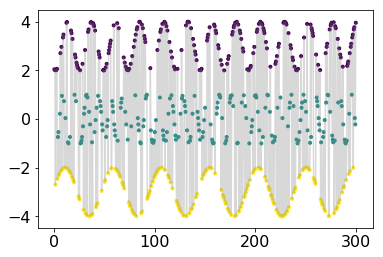

In [49]:
plt.plot(msig.timestamps, msig.mixed_signal, color='grey', alpha=0.3)
plt.scatter(msig.timestamps, msig.mixed_signal, marker='.', c=msig.labels)

In [50]:
# define model
model = Sequential()
# model.add(Masking(mask_value=-1, input_shape=(1,)))
# model.add(LSTM(5))
# model.add(LSTM(5, input_shape=(2, 1)))
model.add(LSTM(5, input_shape=(1, 2)))
# model.add(LSTM(5, input_shape=(n_timesteps, 2)))
model.add(Dense(n_signals, activation='softmax'))


# model.add(LSTM(32, return_sequences=True, input_shape=(timesteps, data_dim)))
# model.add(LSTM(32, return_sequences=True))
# model.add(LSTM(32))

# model.add(LSTM(2048, return_sequences=False, input_shape=self.input_shape, dropout=0.5))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

for i in range(200):
#     X, y = msig.generate_batch(64)
    X, y = msig.generate()
    model.fit(X, y, epochs=1, batch_size=1, verbose=1, shuffle=False)
#     model.reset_states()
#     model.fit(X, y, epochs=1, batch_size=1, verbose=2)

x_test, y_test = msig.generate()
score = model.evaluate(x_test, y_test, batch_size=1)
print(score)

Epoch 1/1
601/601 [==============================] - 1s 2ms/step - loss: 0.8877 - acc: 0.6073
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.6669 - acc: 0.9002
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.5451 - acc: 0.9168
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.4549 - acc: 0.9601
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.3846 - acc: 0.9501
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.3425 - acc: 0.9517
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.2982 - acc: 0.9700
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.2705 - acc: 0.9584
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.1969 - acc: 0.9601
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.1358 - acc: 0.9667TA: 0s - loss: 0.2179 - a
Epoch 1/1
601/601 [================

601/601 [==============================] - 1s 1ms/step - loss: 0.1406 - acc: 0.9784A: 0s - loss: 0.3775 - acc
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.1025 - acc: 0.9784A: 0s - loss: 1.2236 
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.1187 - acc: 0.9700
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.1839 - acc: 0.9667
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.1544 - acc: 0.9717
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.2242 - acc: 0.9634
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.2042 - acc: 0.9634
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.1848 - acc: 0.9684
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.1877 - acc: 0.9617
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.1438 - acc: 0.9750
Epoch 1/1
601/601 [====

601/601 [==============================] - 1s 1ms/step - loss: 0.1937 - acc: 0.9651A: 0s - loss: 0.4586 - acc: - ETA: 0s - loss: 0.2209 - acc: 0.96
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.1293 - acc: 0.9767
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.1472 - acc: 0.9734
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.2353 - acc: 0.9617
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.1893 - acc: 0.9750A: 0s - loss: 0.1909 - acc: 0.974
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.2155 - acc: 0.9617A: 0s - loss: 0.3008 - acc: 0. - ETA: 0s - loss: 0.2177 - acc: 0.961
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.1980 - acc: 0.9651
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.2348 - acc: 0.9651
Epoch 1/1
601/601 [==============================] - 1s 1ms/step - loss: 0.2251 - acc: 0.9651

In [ ]:
y_hat = model.predict(x_test)
for i in range(len(x_test)):
    print('Expected', y_test[i], 'Predicted', y_hat[i])

(601, 1, 2)
(601, 3)
(601,)
(601,)


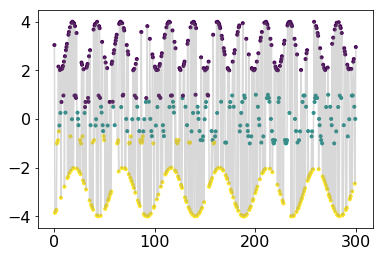

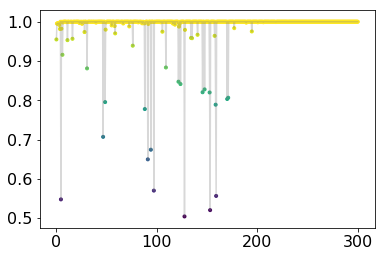

In [51]:
x_test, y_test = msig.generate()
print(x_test.shape)
y_hat = model.predict(x_test)
print(y_hat.shape)
y_pred = np.argmax(y_hat, axis=1)
print(y_pred.shape)
y_error = np.max(y_hat, axis=1)
# y_error = msig.labels - y_hat
print(y_error.shape)
plt.plot(x_test[:, 0, 0], x_test[:, 0, 1], color='grey', alpha=0.3)
plt.scatter(x_test[:, 0, 0], x_test[:, 0, 1], marker='.', c=y_pred)
plt.show()

plt.plot(x_test[:, 0, 0], y_error, color='grey', alpha=0.3)
plt.scatter(x_test[:, 0, 0], y_error, marker='.', c=y_error)
plt.show()